# S1 2024 COMPSCI 714 - Tutorial 1: Loading, exploring and pre-processing data

Welcome to Tutorial 1! This tutorial covers basics of how to load datasets from files or repositories, explore the data structure and important characteristics, and some basic data cleaning and pre-processing steps using a tabular dataset.

*Disclaimer: a big part of the code and text used in this Notebook is directly reused or adapted from Aurélien Géron's notebook: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb and his book "Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow, Ed.3", more particulary from Chapter 2.*

Note: To format text in a Notebook, you need to select "Markdown" for the cell type, and use the Markdown syntax. You can find a basic Markdown synthax guide at the following link: https://www.markdownguide.org/basic-syntax/.  
You can also find a useful Markdown cheat sheet on the IBM website: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

First of all, we need to import some libraries we will use in this tutorial:

In [1]:
import numpy as np # Scientific computing library
import sklearn # Machine Learning library
import matplotlib.pyplot as plt # Visualisation library

In [2]:
# Libraries used to load and manipulate data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In this Tutorial, we will use the **californian districts housing dataset** (available at https://github.com/ageron/data) to go through the different steps involved to load, explore, clean and pre-process the data. This dataset contains tabular data. Note that the exploration, cleaning and pre-processing step will differ depending on the type of data you deal with.

The task for this dataset is to predict the median house price in a district based on several attibutes such as the position of the district, the total number of rooms in the district, the housing median age in the district, etc...

## Step 1: Load the dataset

Let's create a helper function to load a dataset from a file uploaded from a url. We will use the Californian districts housing dataset available at https://github.com/ageron/data.

**Todo:** Have a look at the function, and identify the following processing steps:
1. Checking for the compressed tgz file containing the dataset.
2. If it not found, create a new directory named "datasets", download the tgz file from the url and extract its content into the newly created directory.
3. Read the dataset csv file (i.e., load the content in a Panda DataFrame), and return it.  

*Tip: Do not hesitate to look at a function/method's documentation to better understand what it does.*  

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Step 2: Have a first look at the data

Now that the data is loaded in a Panda Data Frame, we can have a first look at how it is structured.

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Todo:** How many instances (rows) does this dataset have? What are the different types of attributes (columns) in this dataset?  
Notice that for one attribute, the count value is not the same as for the other attributes. Why is that?

Let's have a closer look at the last attribute `ocean_proximity`:

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

We can also get statistics for each numerical attibute:

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Todo:** What statistics are calculated? Discuss with your group some insights about this dataset you can derive from these values.

You can also visualise the distribution of values for each attibute by using histograms:

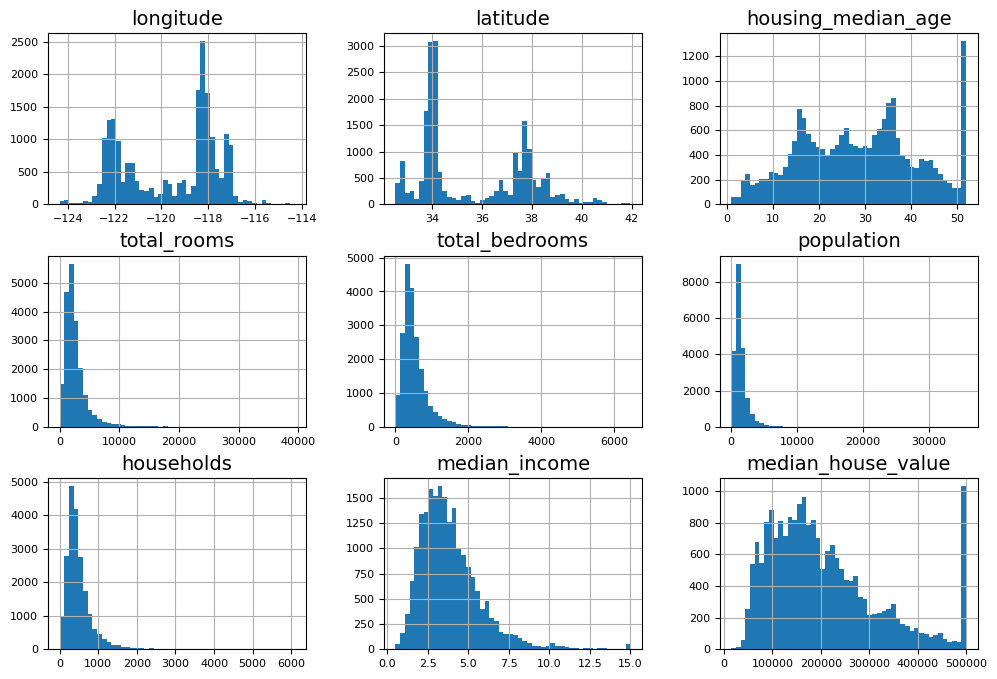

In [8]:
# If needed, you can change the font sizes with the following 5 lines.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# Code to generate and plot the histograms for the numerical attributes
housing.hist(bins=50, figsize=(12, 8))
plt.show()

**Todo:** What observations can you make about the data when looking at these histograms? Look at the form of the distributions, the scale of the axis, and if you can notice any odd paterns.

Once you have discussed your observations with your classmates, you can run the following cell to reveal some insights and compare them with what you discussed.  

In [9]:
def read_insights(file):
    with open(file, "r") as file:
        print(file.read())
read_insights("do_not_read.txt")

- The median income attribute does not look like it is expressed in dollars. When asked, the team that collected the data tells you that 1. the numbers roughly represent tens of thousands of dollars (e.g. 3.0 is approximately $30 000) and 2. the data was scalled and capped at 15 (acually 15.0001) for higher median incomes, and at 0.5 (  m e dyi a n  ) for lower median incomes. Working with preprocessed attributes is common in machine learning, and it is important to understand how the data was computed.

- The housing median age and te median house value were also capped (see the large bin at the end of the dstribution). The cap on the median house value might be a serious problem as this is the target we want to predict. The model might learn than the house value never goes higher than $500 000, while this last bin might include house values highe than $500 000. In that case, you need to refer to the task (e.g., check with you client) to see if this is a problem. If the task requires 

## Step 3: Set a test set aside

Before exploring the data further, you should set a portion of it aside at this stage. This is called a test set, and it will be used for model evaluation and validation. It is important to set it aside now, because you should not look at your test set at all before the final evalaution of your model. We will discuss this further in the lectures and tutorials next week.  
When creating a test set, you can choose one of the two approaches depending on the size of your dataset.
- If your dataset is large enough (especially relative to the number of attributes): sample purely randomly from the dataset.
- If your dataset is not large and you know that an attribute has a high influence on the target prediction: use stratified sampling to avoid introducing a significant sampling bias. This ensures that your test set has a similar distribution of values for each attribute as the full dataset. Else, the estimated importance of a category of values for a specific attribute might be biased. 


Coming back to the housing dataset, imagine you are told that the median income attribute is very important to predict the median house value. Run the next two cells to create and display an histogram of the median income split into 5 bins. Notice that the first cell creates a new attribute in the Panda Dataframe `housing` called `income_cat`, which corresponds to the category of income the instance (district) is binned into. 

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

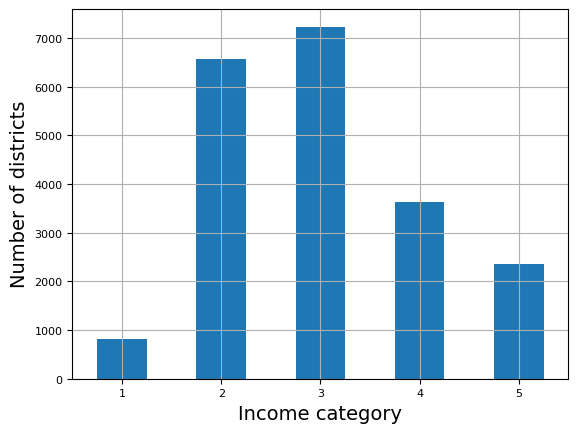

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

We can then use the `train_test_split` function from the `sklearn.model_selection` module to perform the train/test set split. We need to specify the test set size (here 20% of the total dataset), and the attribute we want to use as reference for the stratify sampling process (the income category).  
Notice that we also specify a random state number. This is to ensure that we always get the same instances in the test set when we run the train/test split several times. 

In [12]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

To visualise the effect of stratified vs random sampling with our dataset, run the following cell to generate a table comparing the sampling bias (error) for the to different approaches, with respect to the income categories in the overall dataset.

In [13]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Before moving on, we need to remove the attribute *income_cat* that we created for the stratified sampling:

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Now that we have a test set set aside, we can further explore the data left in the train set that will be used to train the model.

## Step 4: Explore and visualise the data 
To gain more insights about the data, which might help us make choices further down the line, we can use more sophisticated visualisations, and also look at correlations in the data.  
We will keep the test set aside and use the training set to run further exploration. If you training set is too large, you can sample an exploration set to make the exploration easier and faster.  

Fist of all, let's make a copy of the training set, to be able to reverse back to it after making transformations for the exploration.


In [15]:
housing = strat_train_set.copy()

### Visualisation of geographical data

First, notice that the dataset contains some geographical localisation attributes (latitude and longitude). A first interesting visualisation would be to display a scatterplot of the geographical position of all the districts.  
**Todo**: Write a Python instruction the following cell to generate and display such a plot.  
Hint: you can use the Panda Dataframe plot() method with the `housing` variable. 

<Axes: xlabel='longitude', ylabel='latitude'>

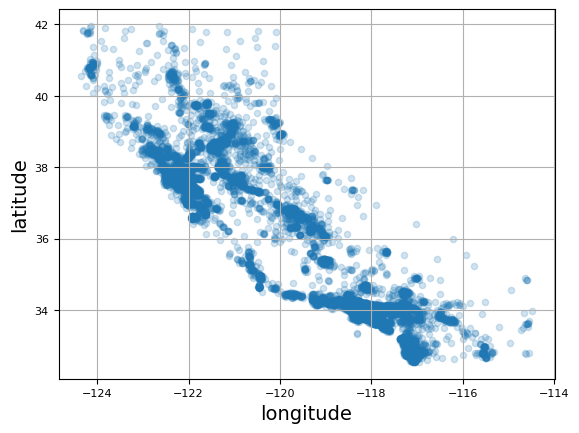

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha = 0.2)

**Todo**: Does the shape remind you of anything? (if not, you might want to switch the x and y coordinates)  
Play around with the options for the visualisation. E.g., set the `alpha` parameter (it regulates the transparency of the plot) so that you have a better idea of the density of points in the plot. Where are most districts situated? 

Once you have complete the previous instruction, you can run the following cell to plot the districts localisation, combined with the population information (radius of the cicle), and the median house value (colour).

<Axes: xlabel='longitude', ylabel='latitude'>

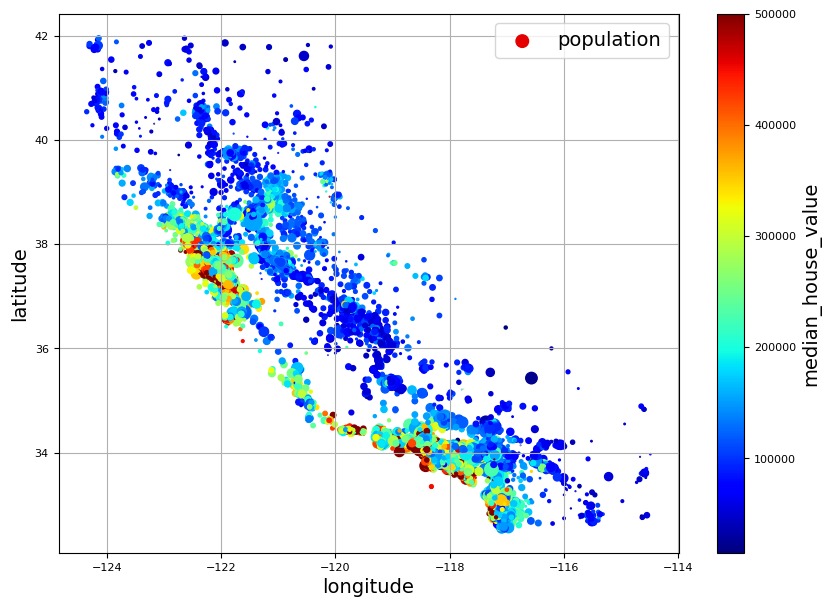

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

**Todo**: Discuss some insights you can get from this visualisation. What attributes in the dataset are likely to be influencial on the target (median house value)? 

Next, we can look at the correlations between attributes by calculating the standard correlation coefficent, or Pearson's correlation coefficient.  
Run the following code to compute the correlation matrix containing the correlation coefficient between each pair of attributes, and then look at the correlation of each attribute to the target median house value.

In [18]:
corr_matrix = housing.corr(numeric_only=True) #Need to set numeric_only to True with Pandas 2.0
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

**Todo**: Discuss what insight you can get from these correlation values. Do you see any notable correlations?

### Correlations

Machine learning algorithms are trying to build models by learning patterns in data. These patterns are linked to correlations between attributes and targets. 
You can also visualise correlations by using scatter plots.  
**Todo**: Complete the code below to use the Pandas `scatter_matrix` function to plot the 3 most correlated attributes with the target median house value, as well as the target attribute. This function plots a matrix of the attributes values against each other. 

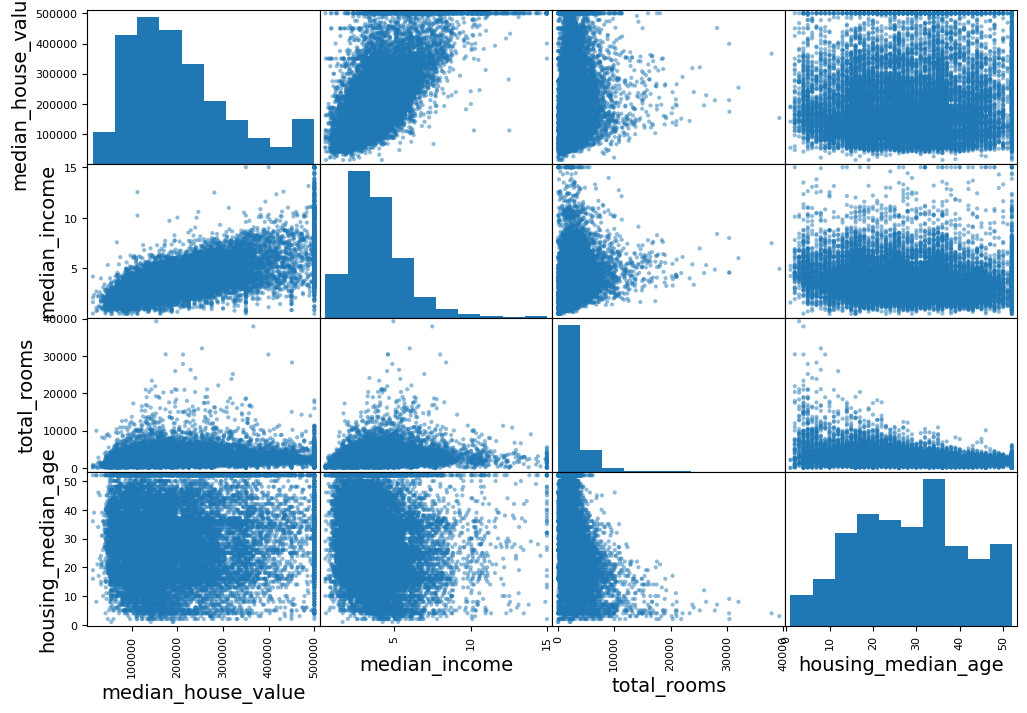

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] # Extend this list with the 3 most correlated attributes with the target
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In such correlation matrix, the main diagonal is usually composed of straight lines as it plots the each attribute against itself. Pandas `scatter_matrix` plots the histogram of the values for this attribute instead, which is a more useful information.  
Let's have a closer look at the most correlated attribute, the median income.  
**Todo**: Write a Python instruction in the next cell to plot the median house value (y axis) against the median income (x axis), with a low transparency coefficient `alpha` value (e.g., 0.1).

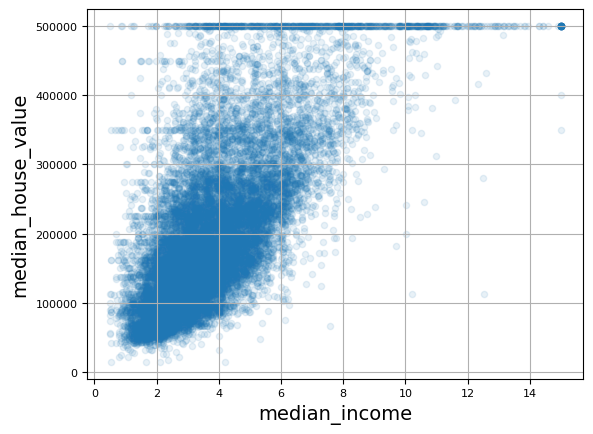

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, alpha= 0.1)
plt.show()

**Todo**: Discuss some observations you can make from this plot.  
Once you have discussed a few observations, you can run the next cell to reveal more insights. 

In [21]:
read_insights("do_not_read2.txt")

- The correlation is quite strong visually, with a clear upward trend and poitns not too dispersed. 

- You can identify the median house value cap with an strong horizontal line at $500 000.

- You can also see less visible horizontal lines around $450 000, $350 000, and maybe $280 000, $260 000, etc... These might be linked to some irregularities in the data collection or recording. There may be a risk for your algorithm to pick these misleading trends up, which might be detrimental to you model performance. Therefore, you may want to remove the correponding data points.


Be mindful that the correlation coefficient only consider linear correlations. There might also be some interesting non-linear correlations in the data, useful for a algorithm to build a model, if it is able to learn non-linear patterns.

### Attribute combinations

A last thing you might want to try is to create combinations of existing attributes and see how they correlate with the target. Some of the existing attributes might not be very interesting by themselves (e.g., the total number of bedrooms in a district), but might give you better insights if combined with other attributes.  
**Todo**: Complete the following code to add 3 new attributes to the housing DataFrame:
- The number of rooms per household
- The bedroom ratio (total number of bedrooms with respect to the number of rooms)
- The number of people per household

In [22]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

**Todo**: Once you added the new attributes, run the following cell to calculate the correlation coefficients again and display the correlations with respect to the target median house value. 

In [23]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

**Todo**: Are the new features more informative? Discuss extra insights you might get from this result. 

You do not have to test everything and explore every aspect of your data during this exploration stage. The main objective is first to verify if there is interesting patterns to be modelled in the data, and then to give you general insights which might help you to make choices for the next steps and training a model later on.  
The process of training a model is highly iterative, as we will see again in later stages. You might end up needing to explore your data further after training and evaluating your model a first time, to gain further insights about how to improve it. 

## Step 5: Data cleaning
After getting some insights about the data, you need to clean it. Cleaning the data usually involves:
- Dealing with missing values in the dataset
- Removing outliers

Before starting this process, it is best to revert to a clean dataset and seperate the predictive attributes from your target attribute in the dataset.

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the selected column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`.

### Dealing with missing values
Remember from the data exploration phase that some instances have missing values for the `total_bedrooms` attribute. Most machine learning algorithms do not handle well missing values, so it is generally necessary to fix this before you use the data to train a model. There are three main ways to do so:
1. Remove the instances with missing attribute value
2. Remove the whole attribute
3. Impute the missing value, i.e. replace it with some value such as zero, the mean, the median, etc.

You may choose on approach or another depending on your problem, your data, the reason the values are missing, etc. Each approach comes with its own caveats. Removing instances or attributes might result in potentially loosing some valuable information (especially if you have a small dataset with a small number of attributes), while imputing values might introduce some noise to your data.  

You can directly use the Pandas DataFrame's `dropna()`, `drop()` and `fillna()` methods to perform repectively instance removal, attribute removal and imputation.  
E.g.:  
```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

Let's choose to impute the missing values for our case, since it is the least destructive option, and the dataset rather small dataset with few attributes. Instead of using the Pandas DataFrame methods listed above, let's use a the Scikit-Learn `SimpleImputer` class. This is a more sophisticated approach which will allow us to train an imputer able to impute values not only for the training set, but also for the validation set, test set, and for any new data instance fed to the model.  
*Note: The validation set is used to validate the choices made when training the model, before evaluating the final version of the model on the test set. We will talk more about it next week.*

Run the following cell to create a `SimpleImputer` instance, using the median value of an attribute to replace any missing value for this attribute: 

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

The median can only be computed for numerical attributes. Therefore, it is necessary to create a copy of the dataset with only the numerical attributes. You can do so by running the following cell:

In [26]:
housing_num = housing.select_dtypes(include=[np.number])

You can now compute the mean for each attribute using the `fit()` method on the `imputer` instance:

In [27]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The median value for each attribute is stored in the `statistics_` field of the `imputer` instance. Run the following two cells to compare the `statistics_` field with the manually computed median values for each attribute:

In [28]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [29]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

You can now impute the missing values by using the `tranform()` method on the `imputer` instance:

In [30]:
X = imputer.transform(housing_num)

**Todo**: Check the type of the object returned by the `tranform()` method. Is it still a Panda DataFrame?  
You can run the following code to wrap `X` back to a Panda DataFrame. Take a little bit of time to understand this instruction, as you are likely to use this kind of wrapping regularly when manipulating data. 

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

Run the following two cells to compare the missing values rows before and after imputation.

In [32]:
null_rows_idx = housing.isnull().any(axis=1) # Get the index from the missing value instances in the original data
housing.loc[null_rows_idx].head() # 5 first instances with missing values before imputation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [33]:
housing_tr.loc[null_rows_idx].head() # 5 first instances with missing values after imputation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


Note that you can choose the replace the missing values with other strategies. To do so, you can change the `strategy` parameter passed to the `imputer` instance when you create it, e.g.:
- With the mean value of the attribute (`strategy="median"`)
- With the most frequent value of the attribute (`strategy="most_frequent"`)
- With a constant value (`strategy="constant", fill_value=...`)

The two last stategies work also for non-numerical attributes. 

**Todo**: Modify the code in the previous cells to impute values with a different strategy. If you use a method working with non-numerical attributes, you can include the `ocean_proximity` attribute. 

There exists more advanced imputers in the `sklearn.impute` module. For example, the `KNNImputer` replaces missing values with the mean value of the k-nearest neighbors. The distance between 2 instances is computed using the attributes without missing values for neither instance. Another more advanced imputer is the `IterativeImputer`. It iteratively trains a regression model per attribute and predict the missing values based on all the other attributes.  
You do not have to use these different approaches for this tutorial, but do not hesitate to try them out later to see how they perform in comparison. 

**Implementation note**: Scikit-Learn's API is organised around main design principles, using consistent interfaces for the different types of class and objects in the library. For example, the imputers we used previously can be used to run some estimations and transformations on the data. They are a type of *Transformers* object, building on the *Estimators* class. You can learn more about the design rules used in Scikit-Learn API at: https://scikit-learn.org/stable/developers/develop.html#apis-of-scikit-learn-objects. 

### Removing outliers

Outliers are data points (instances) that are noticeably different from the rest of the data. There are usually "out of pattern" and they can be due to data collection or recording issues. You may want to drop them to prevent your learning algorithm from being influenced by them when training your model.  
Detecting outliers is not always an easy problem, and there are several possible approaches and methods you can use. One popular method is the isolation forest algorithm, which is an unsupervised technique using binary trees to detect outliers. Use the `IsolationForest` class from the `sklearn.ensemble` module to perfom outlier detection on your data.  
Run the following cell to perform the outlier detection:


In [34]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

Notice that we pass `X` as parameter to the IsolationForest `fit_predict()` method. This is because this method takes an array-like parameter, so it would generate an error if we try to pass a Pandas DataFrame.  
Run the following two cells to see the output of the detection and the shape of the return value:

In [35]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [36]:
outlier_pred.shape

(16512,)

The returned value is an array containing a number for each instance of the training set. If the number is 1, it means that the instance is predicted as an outlier, if it is -1, it means that the instance is not predicted as an outlier.  
You can drop the outliers predicted by the isolation forest, by runing the next cell. We create new variables in case we want to revert to the original dataset. 

In [37]:
housing_no = housing.iloc[outlier_pred == 1]
housing_no_labels = housing_labels.iloc[outlier_pred == 1]

If you wish to visualise the outliers, run the following cell to store the outliers and their labels in two new variables:

In [38]:
outliers = housing.iloc[outlier_pred == -1]
outliers_labels = housing_labels.iloc[outlier_pred == -1]

Run the next cell to visualise the data after removing the outliers (circle markers) and the outliers on the same scatter plot:

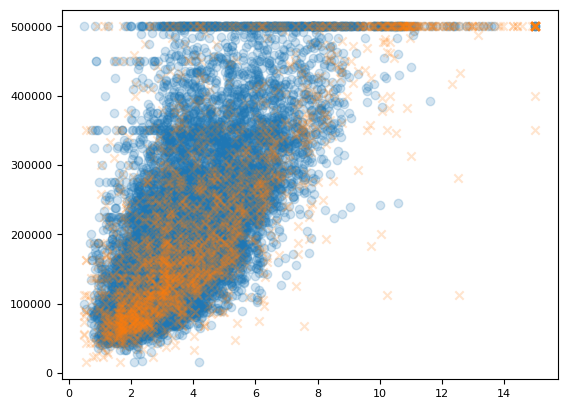

In [39]:
plt.scatter(x=housing_no["median_income"].tolist(), y=housing_no_labels.to_list(), alpha = 0.2, marker="o")
plt.scatter(x=outliers["median_income"].tolist(), y=outliers_labels.to_list(), alpha = 0.2 , marker="x")
plt.show()

Notice that some outliers that were removed do not look so much out of pattern. However, this scatterplot only looks at one attribute (`median_income`) against the target (`median_house_value`). On the other hand, the isolation forest took in consideration all the attributes to predict outliers.  
**Todo**: Modify the previous cell to visualise other attributes against the target. Some outliers might make more visual sense if you look at the data from a different "angle". 

## Step 6: Data pre-processing

After cleaning your data, you need to perform a few more transformation steps so that it is ready to be used by an algorithm to learn a model. These steps are typically called data pre-processing. Note that data pre-processing sometimes include the cleaning steps we described previously. 

In the context of this tutorial, two main pre-processing steps are needed:
1. Transforming text/categorical attributes to numerical attributes
2. Scaling and transforming the data

Depending on the task at hand, you might need to include additional pre-processing steps. For example, if you have a classification task with unbalanced data (i.e., one or more classes are over/under represented in the dataset), you may want to include some preprocessing steps to mitigate this. 

### Transforming text/categorical attributes to numerical attributes
Remember that the attribute `ocean_proximity` is a categorical attribute with text values. You can see this by looking at a few of its values:

In [40]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Categorical means that it can take a limited number of text values, each corresponding to a category.  
Since most machine learning algorithms work only with numerical values for the attributes, you usually need to convert text categories to numbers.  
The most straighforward way to do this is to convert each different text category to a different number. This called *ordinal encoding*. You can use the Scikit Learn's `OrdinalEncoder` to do so:

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [42]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

You can access the different categories using the `categories_` field of the `OrdinalEncoder` instance:

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The category "<1H OCEAN" is converted to 0, " INLAND" to 1, "ISLAND" to 2, "NEAR BAY" to 3 and "NEAR OCEAN" to 4.

The main issue with this type of representation is that a machine learning algorithm will assume that close values are corresponding to more similar categories than distant values. It might be fine in some cases (e.g., if your category has ordered values such as "bad", "average", "good", "excellent"), but it does not make sense in our case. Indeed, categories 0 and 4 are for example conceptually closer than categories 0 and 1. This will be problematic because a machine learning algorithm would learn the opposite.  

A common fix is to encode the categories with a group of binary attributes. Each binary attribute correspond to a category and is set to 1 if the instance is part of this category, 0 otherwise. This is called *one-hot encoding*, because for each instance only one attribute is set to 1 (hot), while the others are set to 0. The new attributes are sometimes called *dummy* attributes.  
You can use the Scikit Learn's `OnHotEncoder` class to convert categorical values into one-hot vectors:

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [45]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that by default, the `transform` and `fit_transform` method returns a Scipy *sparse matrix* instead of a NumPy array.
A sparse matrix is a very effiencient representation of a matrix containing a lot of zeros. This is the case for the output of one-hot encoding with a large number of categories. In this case, using this data structure will speed up computations and save memory. You can use a sparse matrix much like a 2D-array (see SciPy documentation), but if you prefer to work with NumPy arrays, you can convert it with the following instruction:

In [46]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can also set `sparse_output=False` when creating the `OneHotEncoder` instance for the `transform` and `fit_transform` methods to directly return a regular NumPy array:

```Python
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
```

Pandas also offers a function called `get_dummies()` to convert categorical attributes to one-hot encodings: 

In [47]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test, dtype= int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


However, the advantage of using the Scikit-Learn's `OneHotEncoder` class is that once a `OneHotEncoder` instance is fitted to produce an encoding for some training data (with the `fit` method), it will always output the same number of *dummy* categories when used to transform (with the `transform` method) new data. This is important as we want the transformation process to be consistent between the model training phase and when it is used to make new predictions. 
For example, when transforming the same `df_test` than in the previous cell, look at what our `cat_encoder` outputs:

In [48]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

It outputs encodings with values for the 5 categories, where the Pandas `get_dummie()` outputs encodings with only 2 values for the 2 categories in `df_test`. 

Another advantage of Scikit-Learn's `OneHotEncoder` class is the way it handles unknown categories. If you pass data with a new category which is was not in the data used to fit the encoder, a `OneHotEncoder` instance will raise an error, where the Pandas `get_dummies()` function will output an encoding with a new column:

In [49]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


If you run:
```Python
cat_encoder.transform(df_test_unknown).toarray()
```
you will get a ValueError stating:
`ValueError: Found unknown categories ['<2H OCEAN'] in column 0 during transform`

If you want your `OneHotEncoder` instance to handle any unknown category, you can set the `handle_unknown` field to `"ignore"`. In this case, it will represent any unknown category with only zeroes:

In [50]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

Note that if a categorical attribute has a lot of categories, using one-hot encoding will results in a very large number of new binary, *dummy*, attributes. This might end up slowing down training and degrade performances. If that is the case, one option can be to design a numerical attribute to replace the categorical attribute, containing the same information. For example, the `ocean_proximity` could be replaced by a numerical attribute containing the distance to the ocean. Alternatively, you can use one of the encoders provided by the Category Encoder package (https://contrib.scikit-learn.org/category_encoders/).  

In the case of neural networks, which we will focus on in the following tutorials, categorical attributes can be replaced with low-dimensional vectors, learned through the training phase. These vectors are called *embeddings*. These embeddings are particularly used in Natural Language Processing as the data is mostly textual. 

### Scaling and transformations

Scaling is one of the most important pre-processing steps, as most machine learning algorithms do not perform well if the numerical attributes have very different scales.  
This is the case for the housing dataset we are using here. For example, the total number of rooms ranges from about 6 to 39 320, while the median income only ranges from 0 to 15. Without scaling in the pre-processing phase, most machine learning algorithms will ignore the median income when learning the model, and focus more on the total number of room. This is because it would consider that the variables in the median income are too small compared to the ones in the total number of rooms, and therefore not useful to describe the patterns.

As with all pre-processing transformations, scaler should be trained/fitted on the training data only. Once trained, they can be used to transform the validation set, test set and new data points. 

There are two main approaches to get the attributes to have to same scale:
- Min-max scaling (also called normalisation)
- Standardisation

#### Min-max scaling
Min-max scaling is the simplest approach. For each attribute, the values are shifted and rescaled so that they fit in a range from 0 to 1 (or another specified range). 
This is achieved by applying the formula:  
$\Large x_{scaled}=\frac{x - x_{min}}{x_{max}-x_{min}}$  
where $x$ is a value for a specific attribute, $x_{scaled}$ the scaled value, $x_{min}$ and $x_{max}$ the min and max values of this attribute. 

The Scikit-Learn's `preprocessing` module contains several standard scalers, among which the `MinMaxScaler`.
Run the next cell to perform min-max scaling on the numerical attributes of the housing dataset:

In [51]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

The `fit_transform` returns a NumPy array. You can run the next cell to convert it back to a Pandas DataFrame, and plot the attributes to see the effect of the min_max_normalisation (look at the x axis):

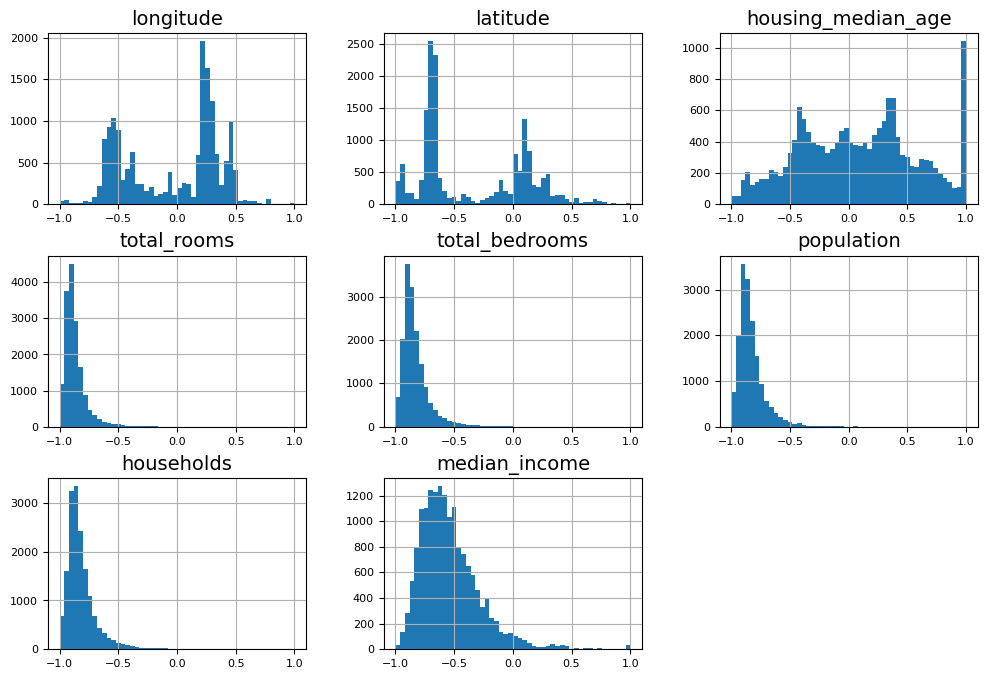

In [52]:
df_housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled,
                         columns=min_max_scaler.get_feature_names_out(),
                         index=housing_num.index)
df_housing_num_min_max_scaled.hist(bins=50, figsize=(12, 8))
plt.show()

#### Standardisation
One of the disadvantages of min-max scaling is that it is sensitive to outliers. If you have an abnormally high value in your data, out of the normal range of values, it will map it to 1, and "squish" all the other values in a very small range. 

Standardisation on the other hand is not much affected by this. It works by substracting the mean value of the attribute (so the standardised data will have a mean equal to 0) and it divides the result by the standard deviation of the attribute (so the standardised data will have a standard deviation equal to 1):  
$\Large x_{standard}=\frac{x - \mu}{\sigma}$  
where $x$ is a value for a specific attribute, $x_{standard}$ the standardised value, $\mu$ the mean of this attribute and $\sigma$ its standard deviation.

You can use the Scikit-Learn's `StandardScaler` transformer to perform standardisation:

In [53]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

You can run the next cell to convert the scaled data back to a Pandas DataFrame, and plot the attributes to see the effect of the standardisation:

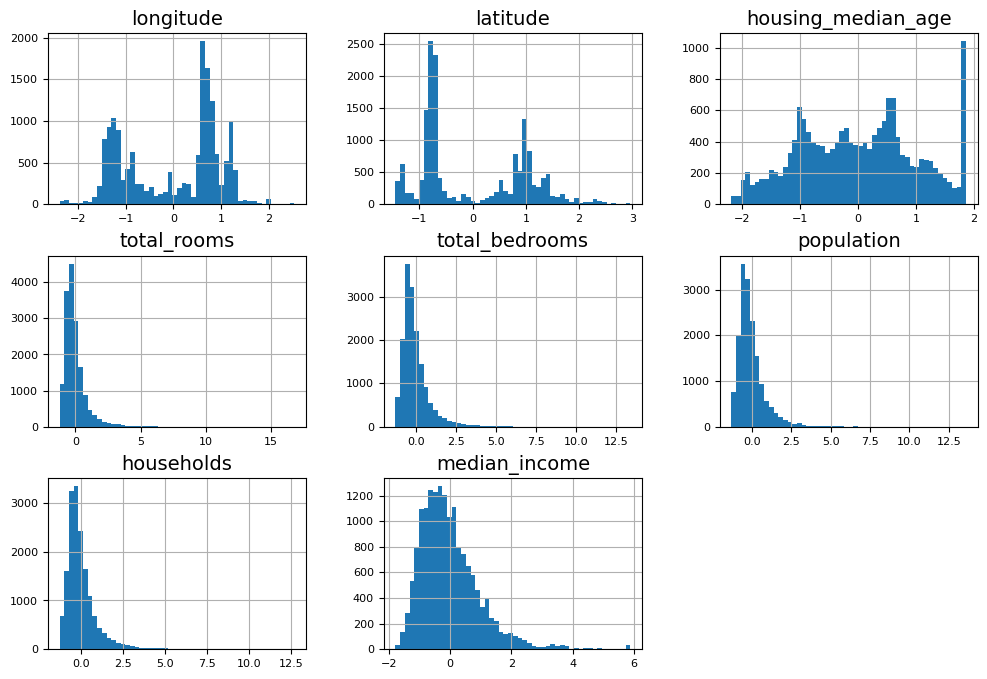

In [54]:
df_housing_num_std_scaled = pd.DataFrame(housing_num_std_scaled,
                         columns=std_scaler.get_feature_names_out(),
                         index=housing_num.index)
df_housing_num_std_scaled.hist(bins=50, figsize=(12, 8))
plt.show()

Note that if you want to apply scaling to a sparse matrix, you can either tranform it to a dense matrix first and run the StandardScaler normally, or use a StandarScaler(with_mean = False). This will only divide the data by the standard deviation, and not substract the mean, because it would break sparsity for a sparce matrix, as a lot of elements would not be equal to 0 anymore.

#### Data distribution transformation

Most machine learning algorithms works best with data following a Gaussian distribution, also known as Normal distribution. Therefore another important step is to transform attributes so that their distribution is close to a Gaussian distribution.  
When the attribute distribution has a *heavy tail*, i.e., data far from the mean are not exponentially rare, a common transformation is to replace the attribute by its square root or to raise it to a power beween 0 and 1. If the tail is very long, such as if it follows a power law distribution, then you can replace the attribute with its logarithm. 

**Todo**: Several features have a heavy tail in the housing dataset. Identify them, and, for one of them, fill the following code to try the squared root and logarithm transformations and see which one bring it closer to a Gaussian distribution (i.e., bell-shaped). 

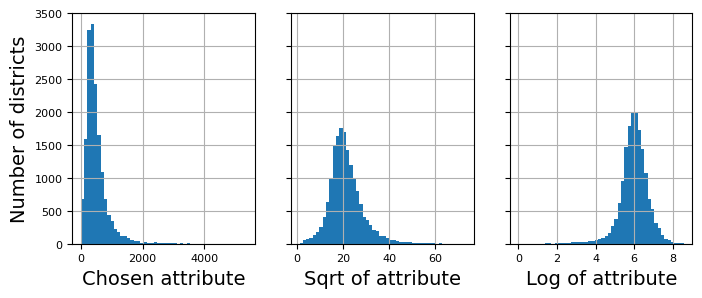

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
housing["households"].hist(ax=axs[0], bins=50)
housing["households"].apply(np.sqrt).hist(ax=axs[1], bins=50)
housing["households"].apply(np.log).hist(ax=axs[2], bins=50)
axs[0].set_xlabel("Chosen attribute")
axs[1].set_xlabel("Sqrt of attribute")
axs[2].set_xlabel("Log of attribute")
axs[0].set_ylabel("Number of districts")
plt.show()

Note that you should perform this kind of distribution tranformation before normalising or standardising the data. 

There are other ways to deal with heavy-tailed distributions, such as using *bucketisation*. This consists in chopping the distribution into roughly equal-sized busckets, and replacing each attribute value by the index of the buckets it belongs to (much like what we did with the `income_cat` attribute earlier). You can find an example of bucketisation in code cell 82 of Aurélien Géron's __[end_to_end ml project notebook](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb)__).

Another common type of distribution you can find in data is the multimodal distribution. This distribution is recognisable by several peaks, or *modes*, in the data. This is the case for example for the housing median age, the latitude and the longitude attributes in the housing dataset. You could also use bucketisation to transform this type of distribution, but this time by treating the index of the bucket as categories, rather thathnn numerical values. Because we are then dealing with a categorical attribute, you will need to encode it with one-hot encoding for example.  
Another approach to transform multimodal distributions is to add an attribute for each of the modes observed in the data. Each new "mode attribute" contains the similarity between the multimodal attribute value and that particular mode. Similarity is typically computed using a *radial basis function* (RBF), such as the Gaussian RBF. This function outputs a value decaying exponentially as the input values move away from a fixed point (i.e., as the radius increases). 

You can implement such transformations (sqrt, log, rbf, etc.) using the Scikit-Learn's `FunctionTransformer` transformer. Run the two next cells to:
- performing a log transformation on the population attribute,
- create an attribute based on the similarity with the mode at age 35 of the housing median age, using an RBF funtion.

In [56]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [57]:
from sklearn.metrics.pairwise import rbf_kernel

rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

`FunctionTransformer` is handy and easy to use, but it does not allow to train your transformer. For example, what if you want to create a transformer which learns different geographical clusters using the longitute and latitude attributes of the training data, and output a number of new attribute representing how close each data instance is from each identified cluster?  
You will need to define your own custom transformer.  
**Todo**: Study the following code. It defines a custom tranformer that uses the `KMeans` clusterer to identify geographical clusters in the `fit()` method. K-Means is a unsupervised clustering algorithm that can be used to find clusters in data. Here, it is configured to look for 10 clusters. The similarity of each instance to each cluster is computed in the `transform()` method using a rbf kernel. 

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

If you are not familiar with defining classes in Python, you can have a look at the following tutorial: https://www.w3schools.com/python/python_classes.asp.  

You can now use this custom transformer:

In [59]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

Run the following cell to visualise the 10 identified cluster centers as well as the level of geographic similarity of each disctrict to its closest cluster center.

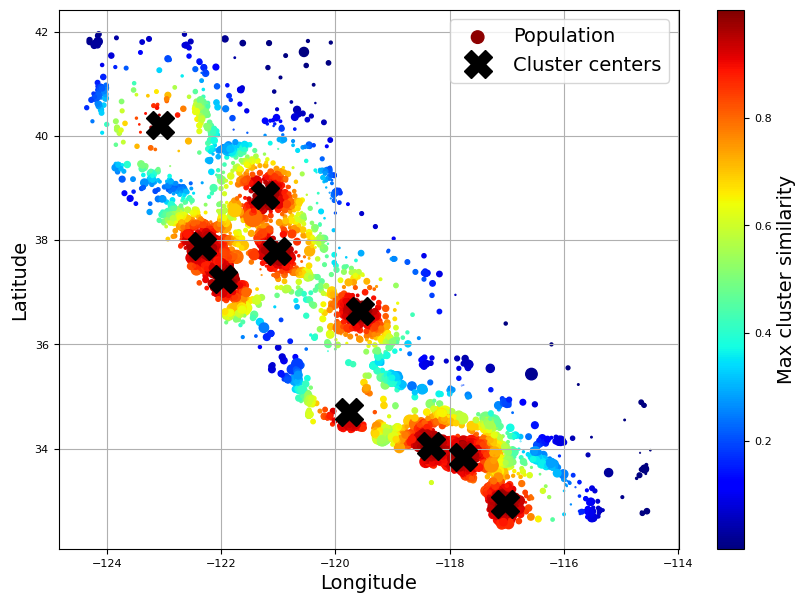

In [60]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

We have seen a number of pre-processing steps to transform the data in a form more adapted to train a model.  
We will now see how we can bring all of these together in a transformation pipeline.

### Step 7: Transformation pipelines


Scikit-Learn provides a `Pipeline` class to build a sequence of transformations. You can see in the next cell a simple pipeline for numerical attributes, which first imputes missing values and then scales the input attributes:

In [61]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

You can visualise the pipeline by running a cell with `num_pipeline` as the last line. The visualisation is interactive and allows you to expand each step to see what parameters are used (e.g., `SimpleImputer` uses the median to impute missing values). 

In [62]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

You can also use the `make_pipeline()` function for a lighter syntax, and if you do not wish to name each transformer in your pipeline (standard names will be given to each of them, using the corresponding transformer's class name):

In [63]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

You can also set the visualisation of the pipeline do a simple diagram if you do not want to use the interactive visualisation:

In [64]:
from sklearn import set_config

set_config(display='text')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Run the following cell to apply this pipeline to the numerical attributes of the housing dataset:

In [65]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

You can run the following cell if you want to visualise the resulting attributes:

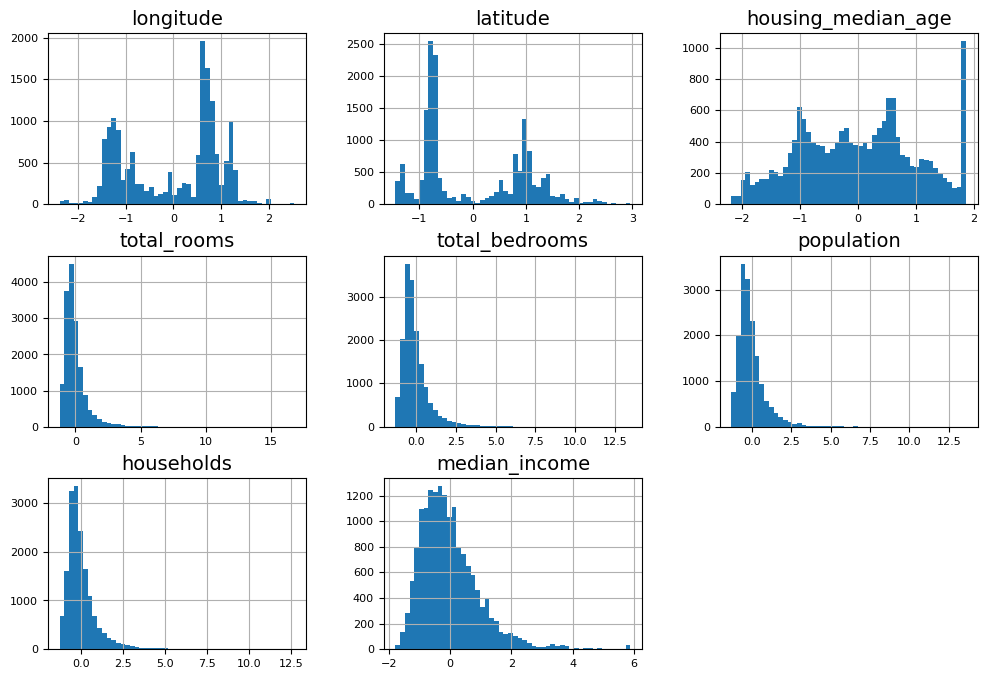

In [66]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                         columns=num_pipeline.get_feature_names_out(),
                         index=housing_num.index)
df_housing_num_prepared.hist(bins=50, figsize=(12, 8))
plt.show()

We have handled numerical and categorical attributes seperatly so far. However, it is possible to define a single tranformer able to deal with both apply the appropriate tranformations to each attribute given its type. For this, you can use the `ColumnTransformer`.  
For example, we define in the next cell a `ColumnTransformer` applying different transformations to attributes listed as numerical and attributes listed as categorical:

In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

It might not be practical to list all the attributes names, especially if you have a lot of them initially. Thankfully, you can use the `make_column_selector` function to automatically select the attributes of a specified type. Similarly as `make_pipeline` previously, you can also use the `make_column_transformer` function to avoid naming the transformers yourself when defining a `ColumnTransformer`. The code in the next cell creates a `ColumnTransformer` by applying our `num_pipeline` to selected attributes with data type `np.number`, and our `cat_pipeline` to selected attributes with data type `object` (which is used for text in Pandas). 

In [68]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

Run the following cell to apply this pipeline to all the attributes of the housing dataset:

In [69]:
housing_prepared = preprocessing.fit_transform(housing)

You can run the following cell if you want to visualise the resulting attributes.

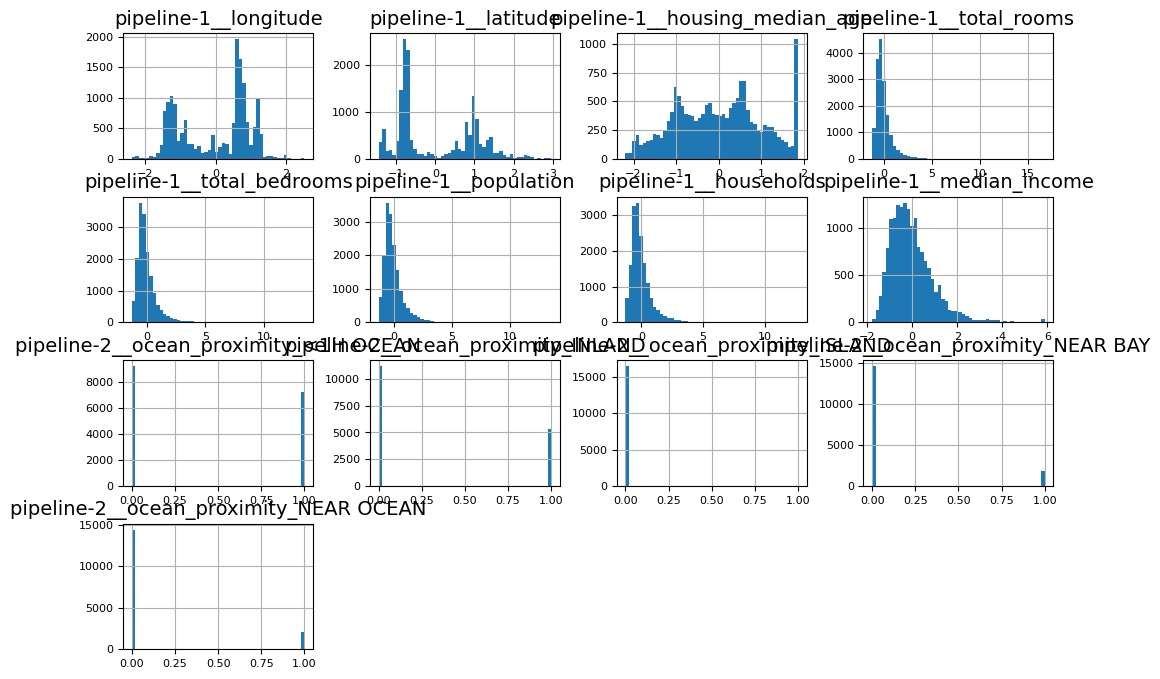

In [70]:
df_housing_prepared = pd.DataFrame(housing_prepared,
                         columns=preprocessing.get_feature_names_out(),
                         index=housing.index)
df_housing_prepared.hist(bins=50, figsize=(12, 8))
plt.show()

Notice that `num_pipeline` and `cat_pipeline` are automatically named respectfully `pipeline_1` and `pipeline_2` and that the categorical attribute `NEAR_OCEAN` is replaced by five numerical binary attributes because of the one-hot encoding.

#### Creating our final preprocessing pipeline
Here is a list of steps we want our final preprocessing pipeline to perform on the housing dataset:
1. Impute missing values for the numerical attributes using their median, and using the most frequent category for categorical attributes.
2. Use one-hot encoding to transform categorical attributes to numerical attributes.
3. Compute and add a few ratio attributes: `bedrooms_ratio`, `rooms_per_house` and `people_per_house`.
4. Add cluster similarity attributes using the `ClusterSimilarity` transfomer we defined.
5. Replace heavy_tailed attributes with their logarithm.
6. Standardise all numerical attributes.

**Todo**: Discuss the reason why we apply each of these steps. Then, study the code below and match each of the steps listed above with the code corresponding to them. 

In [71]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

**Todo**: Finally, complete the code below to apply this pipeline to the `housing` DataFrame. Print the shape of the output and visualise the resulting attributes. 

In [72]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

Run the following cell to get the name of the resulting attributes:

In [73]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

**Todo**: Insert a cell below and write some code to visualise the resulting attributes.

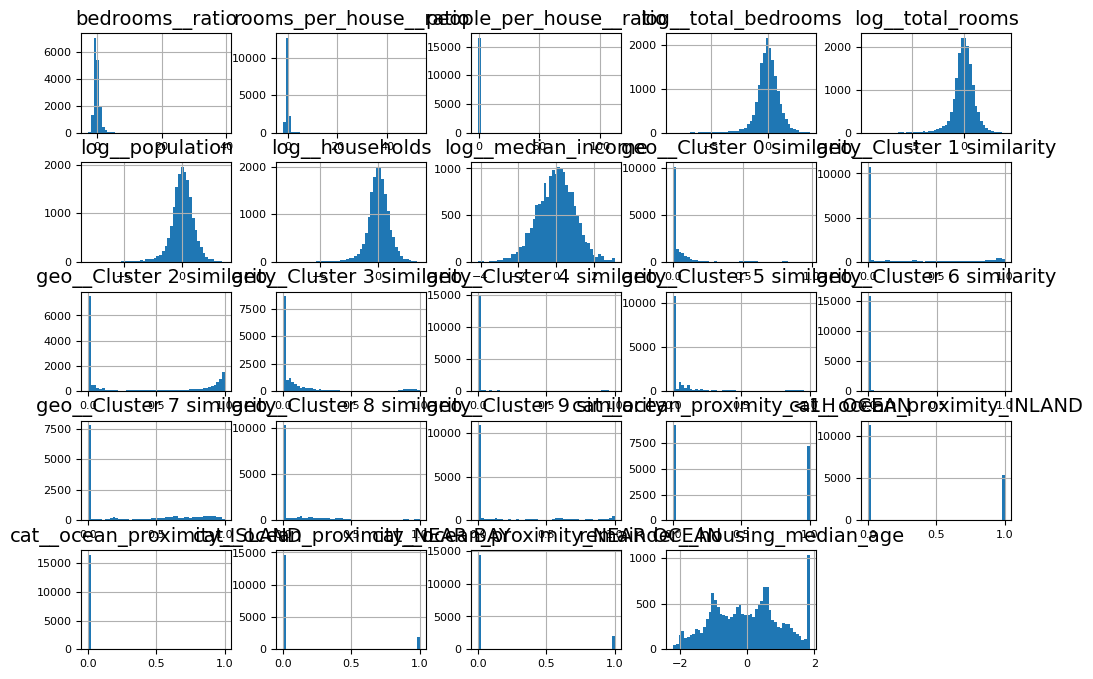

In [74]:
df_housing_prepared = pd.DataFrame(housing_prepared,
                         columns=preprocessing.get_feature_names_out(),
                         index=housing.index)
df_housing_prepared.hist(bins=50, figsize=(12, 8))
plt.show()

## Step 8: Other ways of getting and loading data

At the start of this tutorial, we loaded data from a GitHub repository using the URL of the repository, but there exists other ways to get and load date.

### Loading data from a package
You can also load some datasets directly from Python packages. For example, Scikit_Learn provides a few toy dataset, such as the iris dataset:

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [75]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [76]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Framework specific loaders
Some libraries like TensorFlow and PyTorch have there own data types, classes and methods to load and manipulate datasets.  
Note that the next cell will take a few seconds to run. It not only loads the MNIST dataset (images) from a distant repository, but it also prepares the dataset by splitting it into train and test sets. 

In [77]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

The code in the following cell does a similar job using PyTorch:

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

ds_train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

ds_test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Download data "manually"
You can also simply download the dataset (or build it yourself and store it with the appropriate format in a csv file) on your local machine and load it into a Pandas DataFrame with the `pandas.read_csv()` function.  
However, this might not be possible to download and store very large datasets. These types of datasets are usually stored and accessible on distant repositories, and you can download them directly using the URL of the repository and a custom helper function like the one we designed at the start of this tutorial.

### Web scrapping
Lastly, one way to get data in the era of the internet is to scrap it from webpages. We will not cover web scrapping in this course, but this can be an intesresting skill for you to develop. You can find a good tutorial about it at the following link: https://realpython.com/python-web-scraping-practical-introduction/

## Step $\infty$


You can now load another dataset, explore it, and create an adapted pre-processing pipeline!